<ipython-input-3-1d69cac1ea7f>:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


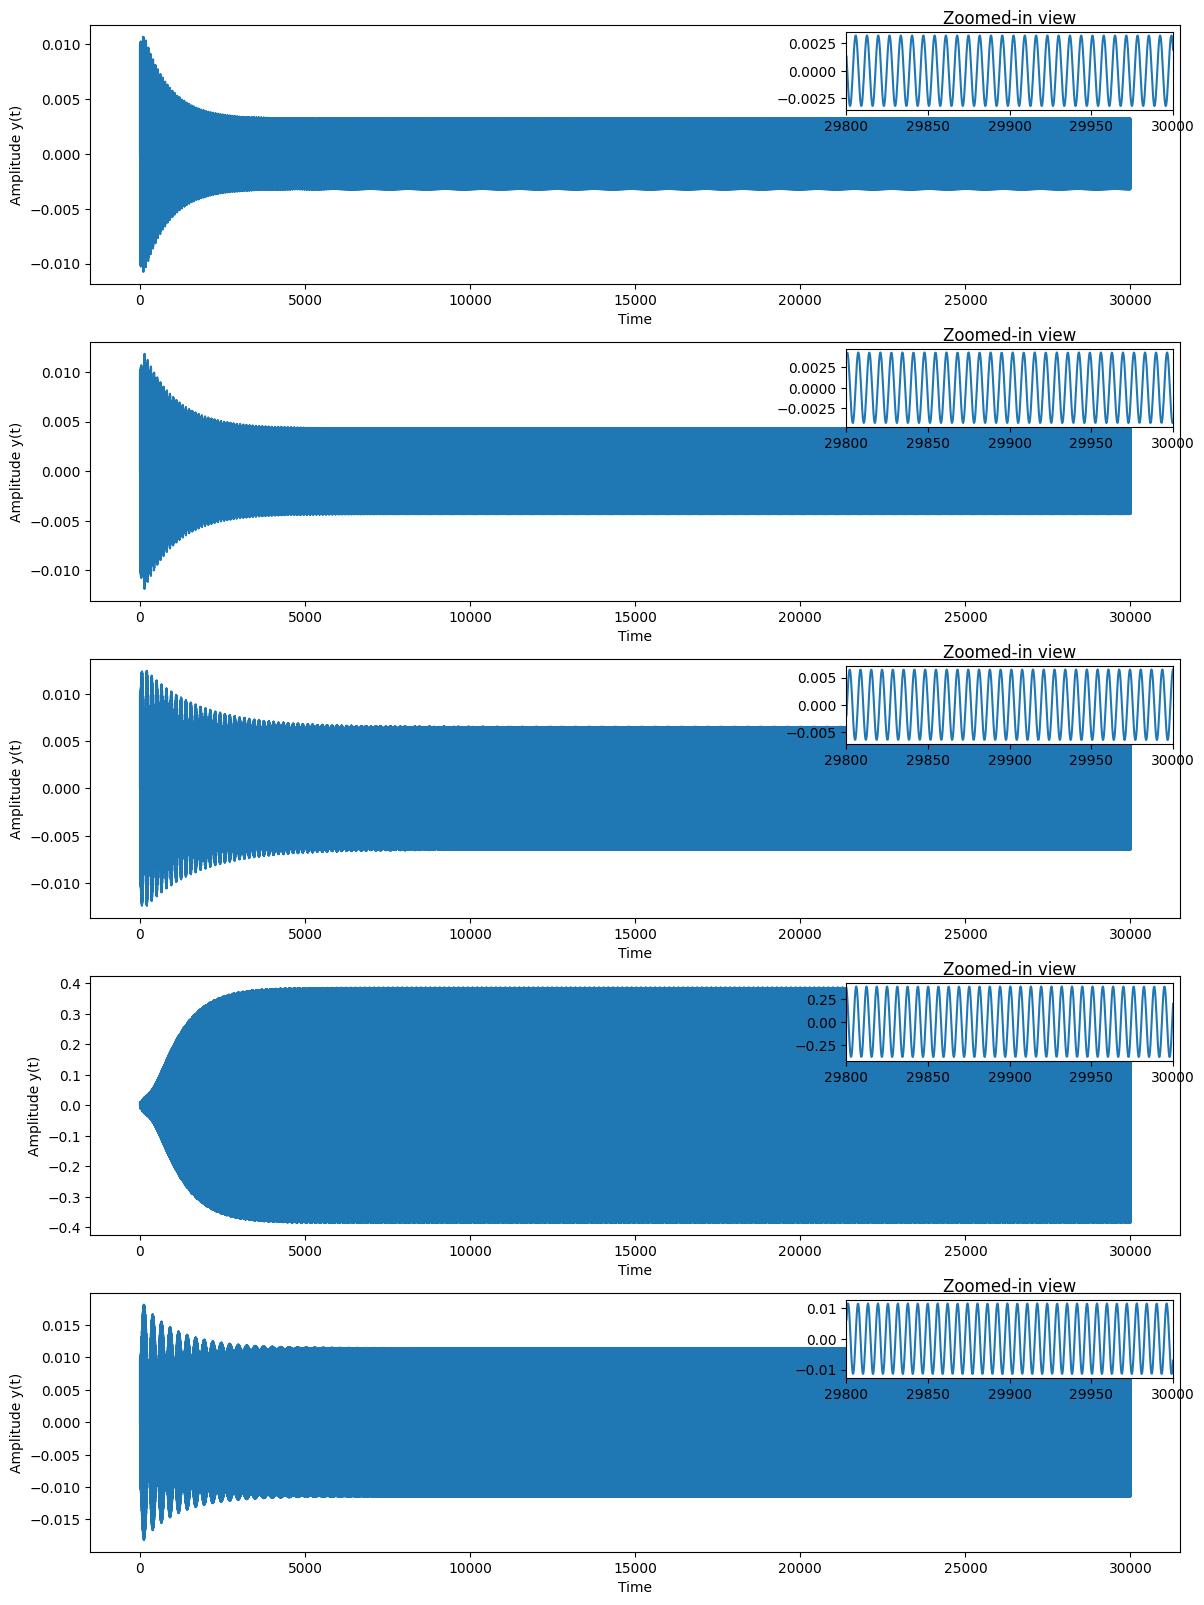

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define constants
epsilon = 0.05
St = 0.1932
A = 4
gamma = 0.8
alpha = 0
Cl_knot = 0.3842
Cd_knot = 1.1856
mu = 195.56
zeta = 0.013 / 195.56
M = Cl_knot / (16 * np.pi**2 * St**2 * mu)

# Array of U_r values
U_r_values = [4.7, 4.8 , 4.9, 5.0, 5.4]

# System of ODEs
def system(U_r):
    def equations(t, Y):
        y, v, q, u = Y
        dy_dt = v
        dv_dt = M * St**2 * U_r**2 * q - (2*zeta + (gamma * St / mu) * U_r) * v - y - alpha * y**3
        dq_dt = u
        du_dt = A * dv_dt - epsilon * St * U_r * (q**2 - 1) * u - St**2 * U_r**2 * q
        return [dy_dt, dv_dt, dq_dt, du_dt]
    return equations

# Initial conditions
Y0 = [0.0, 0.01, 0.0, 0.0]

# Time span
t_span = (0, 30000)
t_eval = np.linspace(t_span[0], t_span[1], 100000)

# Create subplots
fig, axs = plt.subplots(len(U_r_values), 1, figsize=(12, 16))

# Solve the system for each U_r value and plot the results
for i, U_r in enumerate(U_r_values):
    solution = solve_ivp(system(U_r), t_span, Y0, t_eval=t_eval, method='RK45', rtol = 1e-6, atol = 1e-6)
    t = solution.t
    y_sol = solution.y[0]  # y is the first element in the solution vector

    axs[i].plot(t, y_sol, label=f'U_r = {U_r}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude y(t)')


    # Add an inset plot with zoomed-in view
    ax_inset = inset_axes(axs[i], width="30%", height="30%", loc='upper right')
    zoom_range = (2.98e4, 3.00e4)
    zoom_mask = (t >= zoom_range[0]) & (t <= zoom_range[1])
    ax_inset.plot(t[zoom_mask], y_sol[zoom_mask])
    ax_inset.set_xlim(zoom_range)
    ax_inset.set_title('Zoomed-in view')

plt.tight_layout()
plt.show()


<ipython-input-6-6b8894d77d7c>:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


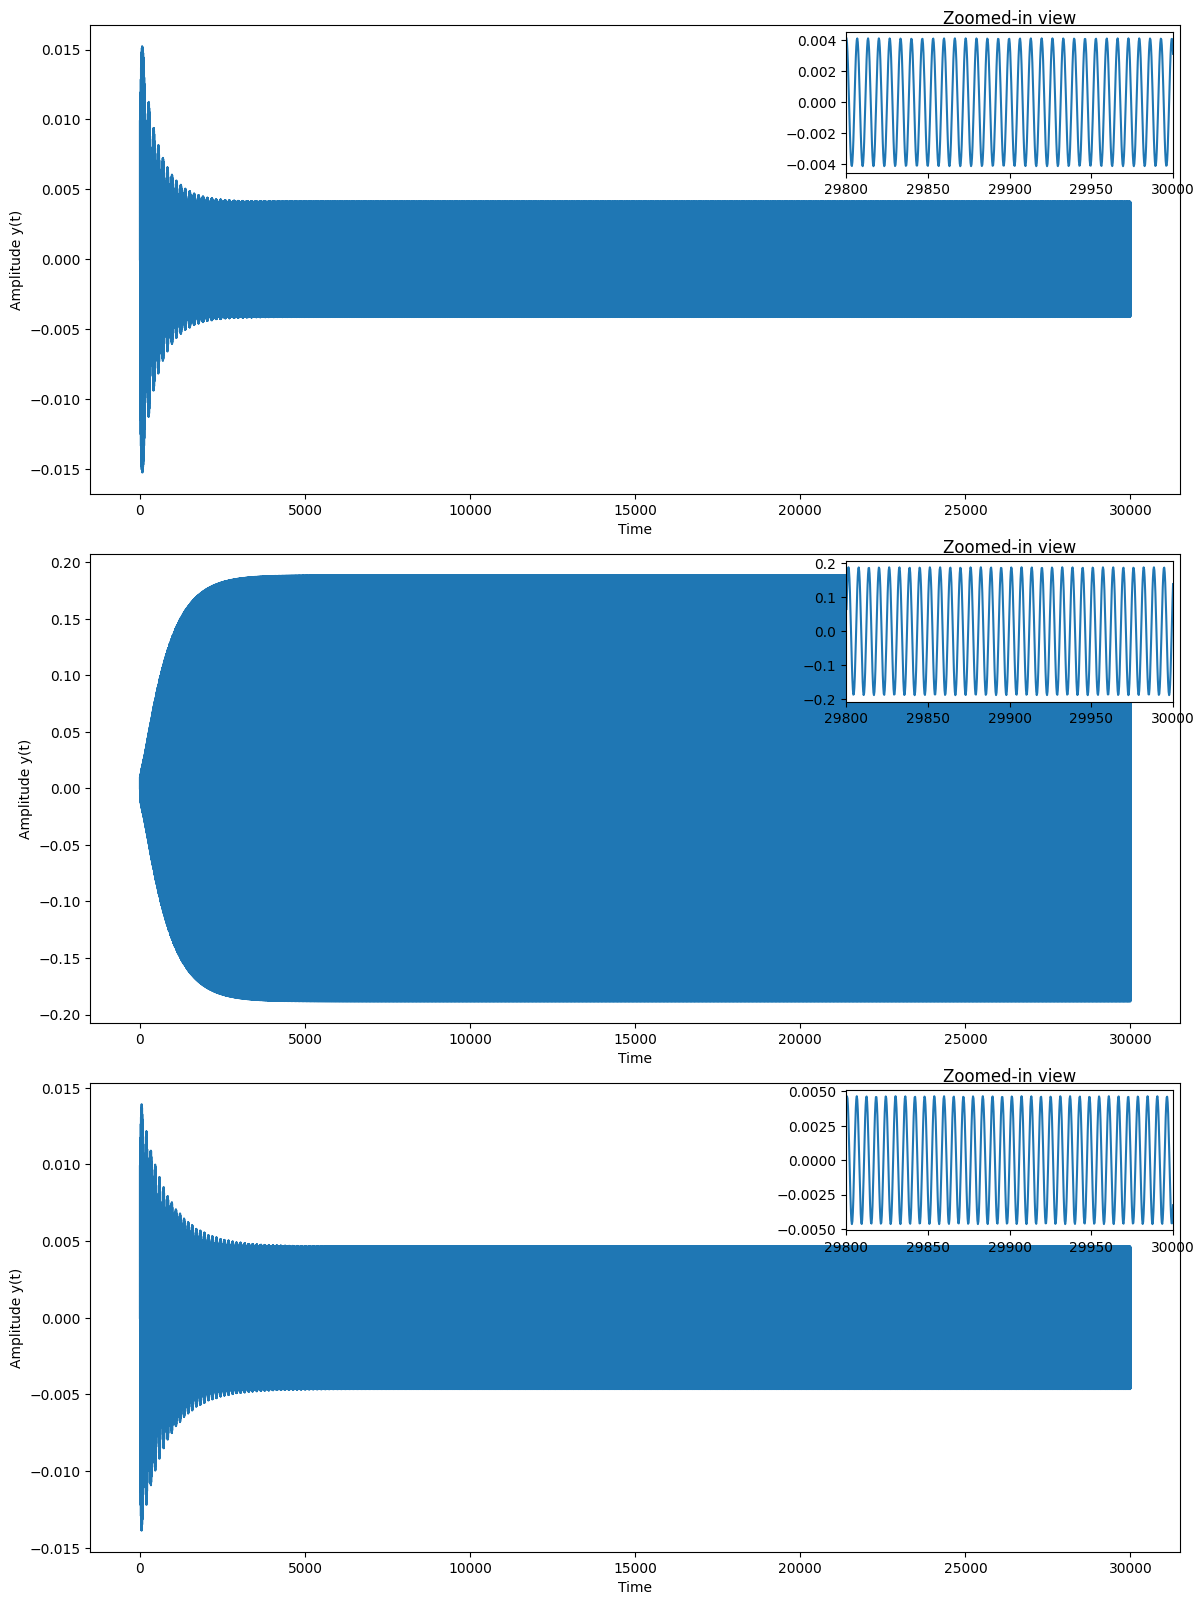

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define constants
epsilon = 0.3
St = 0.2
A = 12
gamma = 0.8
alpha = 0.7
Cl_knot = 0.3
Cd_knot = 1.1856
mu = 195.56
zeta = 0.013 / 195.56
M = Cl_knot / (16 * np.pi**2 * St**2 * mu)

# Array of U_r values
U_r_values = [4.7, 4.8, 5.4]

# System of ODEs
def system(U_r):
    def equations(t, Y):
        y, v, q, u = Y
        dy_dt = v
        dv_dt = M * St**2 * U_r**2 * q - (2*zeta + (gamma * St / mu) * U_r) * v - y - alpha * y**3
        dq_dt = u
        du_dt = A * dv_dt - epsilon * St * U_r * (q**2 - 1) * u - St**2 * U_r**2 * q
        return [dy_dt, dv_dt, dq_dt, du_dt]
    return equations

# Initial conditions
Y0 = [0.0, 0.01, 0.0, 0.0]

# Time span
t_span = (0, 30000)
t_eval = np.linspace(t_span[0], t_span[1], 100000)

# Create subplots
fig, axs = plt.subplots(len(U_r_values), 1, figsize=(12, 16))

# Handle single subplot case
if len(U_r_values) == 1:
    axs = [axs]  # Make axs a list to handle it uniformly

# Solve the system for each U_r value and plot the results
for i, U_r in enumerate(U_r_values):
    solution = solve_ivp(system(U_r), t_span, Y0, t_eval=t_eval, method='RK45', rtol=1e-6, atol=1e-6)
    t = solution.t
    y_sol = solution.y[0]  # y is the first element in the solution vector

    axs[i].plot(t, y_sol, label=f'U_r = {U_r}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude y(t)')

    # Add an inset plot with zoomed-in view
    ax_inset = inset_axes(axs[i], width="30%", height="30%", loc='upper right')
    zoom_range = (2.98e4, 3.00e4)
    zoom_mask = (t >= zoom_range[0]) & (t <= zoom_range[1])
    ax_inset.plot(t[zoom_mask], y_sol[zoom_mask])
    ax_inset.set_xlim(zoom_range)
    ax_inset.set_title('Zoomed-in view')

plt.tight_layout()
plt.show()


In [ ]:
np.savetxt('time_series_data_validation_csv', time_series_data_validation, delimiter = ',')

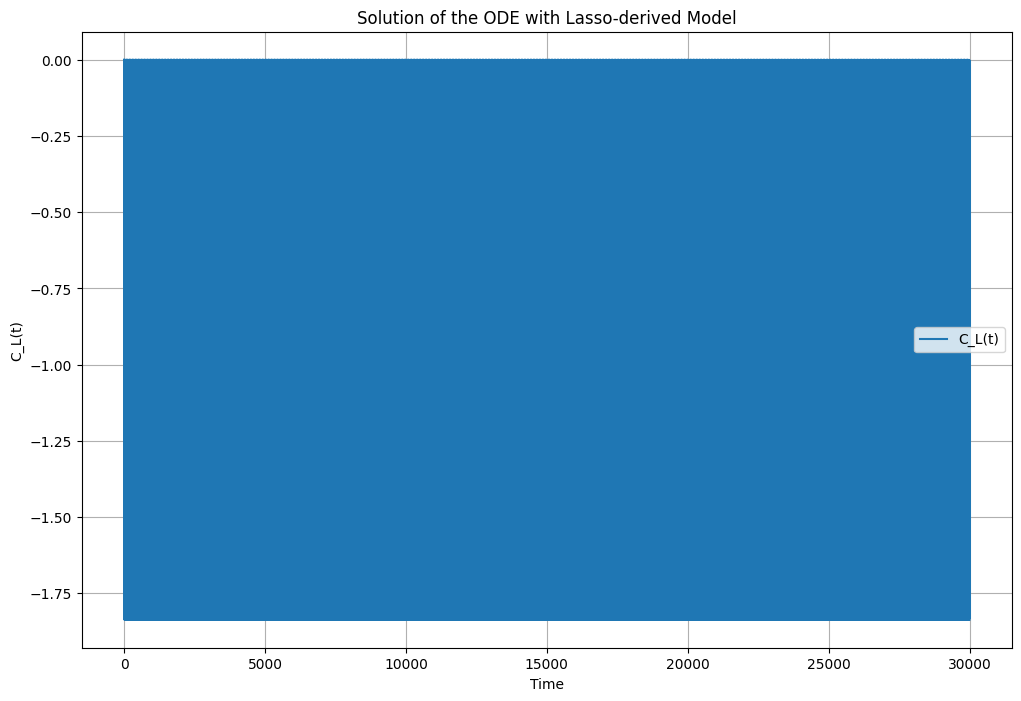

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Coefficients from Lasso regression
coefficients = [-5.25811438, -0.00122060294, 12.4371695, 1.69840719, -1.47274490, 0.480793491]

# Define the ODE system
def ode_system(state, t, coeffs):
    C_L, p = state
    dC_L_dt = p
    d2C_L_dt2 = (-5.35*np.sin(C_L) - 7*np.cos(C_L))
    return [dC_L_dt, d2C_L_dt2]

# Initial conditions
C_L0 = 0.0
p0 = 0.01
initial_state = [C_L0, p0]

# Time points
t_points = np.linspace(0, 30000, 100000)

# Solve the ODE system
solution = odeint(ode_system, initial_state, t_points, args=(coefficients,))

# Extract results
C_L_t = solution[:, 0]

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t_points, C_L_t, label='C_L(t)')
plt.xlabel('Time')
plt.ylabel('C_L(t)')
plt.title('Solution of the ODE with Lasso-derived Model')
plt.legend()
plt.grid()


from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ax_inset = inset_axes(axs[i], width="30%", height="30%", loc='upper right')
zoom_range = (2.98e4, 3.00e4)
zoom_mask = (t >= zoom_range[0]) & (t <= zoom_range[1])
ax_inset.plot(t[zoom_mask], y_sol[zoom_mask])
ax_inset.set_xlim(zoom_range)
ax_inset.set_title('Zoomed-in view')

plt.show()
